# Training an object detection algorithm

## First step: data collection (Pascal VOC 2007 data, https://pjreddie.com/projects/pascal-voc-dataset-mirror/)

In [ ]:
# curl http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar

## Explore sample data

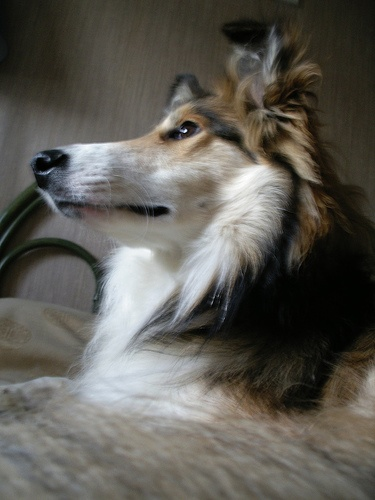

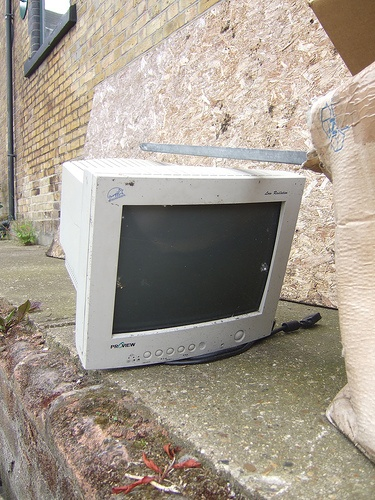

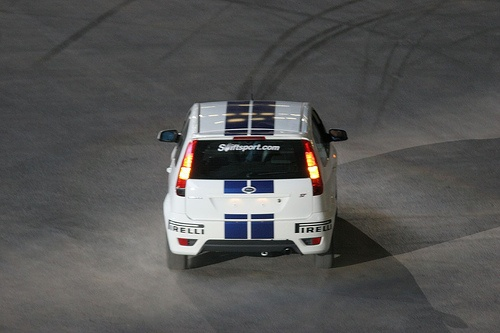

In [1]:
from IPython.display import Image

display(Image(filename='VOCdevkit/VOC2007/JPEGImages/008951.jpg'))
display(Image(filename='VOCdevkit/VOC2007/JPEGImages/008955.jpg'))
display(Image(filename='VOCdevkit/VOC2007/JPEGImages/000012.jpg'))

## Explore how the bounding box information is stored

In [2]:
! cat VOCdevkit/VOC2007/Annotations/000012.xml

<annotation>
	<folder>VOC2007</folder>
	<filename>000012.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
		<flickrid>207539885</flickrid>
	</source>
	<owner>
		<flickrid>KevBow</flickrid>
		<name>?</name>
	</owner>
	<size>
		<width>500</width>
		<height>333</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>car</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>156</xmin>
			<ymin>97</ymin>
			<xmax>351</xmax>
			<ymax>270</ymax>
		</bndbox>
	</object>
</annotation>


## Data processing: Map class names to numbers (1 = aeroplane, 6 = car, etc.)

In [3]:
! cat model_data/voc_classes.txt

aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor


## Model definition: Loading a neural network written in Keras

### Convolutional neural network with 252 layers and 62 million parameters!

In [4]:
import gc
from keras.models import load_model

model = load_model("model_data/yolo.h5")
print(model.summary())
print(len(model.layers))

del model
gc.collect()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, None, None, 3 0           batch_normalization_1[0][0]      
_____________________________________

/home/max/code/yolo/venv3/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


526

## Model training: on a very small data sample with Keras

In [4]:
! python train.py

Using TensorFlow backend.
>>> Use Tiny model
Instructions for updating:
Colocations handled automatically by placer.
2019-04-25 10:39:50.371921: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-04-25 10:39:50.466789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-25 10:39:50.467314: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2452a50 executing computations on platform CUDA. Devices:
2019-04-25 10:39:50.467330: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): GeForce GTX 1060, Compute Capability 6.1
2019-04-25 10:39:50.486795: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2592000000 Hz
2019-04-25 10:39:50.487670: I tensorflow/compiler/xla/service/service.cc:150

## Model evaluation: Check that model performs

In [5]:
from PIL import Image
from yolo import YOLO

yolo = YOLO()
image = Image.open('dog.jpg')
result = yolo.detect_image(image)
result.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
model_data/yolo.h5 model, anchors, and classes loaded.
3.538940714999626
